In [1]:
import os
os.chdir('../src')
import numpy as np
np.set_printoptions(precision=2)

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from directed_gradient import DirectedGradient
from test_optims import sgd_step
import test_fn as test_fn
from terminaltables import DoubleTable as Table
import torch as t
t.set_printoptions(precision=2)

In [99]:
dim = 2
g_std = 0.0

num_epochs = 20
log_int=1
final_table = True

visualize = dim == 2
xlim = 5.0
xc = 2

ylim = 5.0
yc = 2
delta = 0.25

- high sensitivity to learning rate for CGD

In [100]:
lr = {
    'booth': 1e-2,
    'himmelblau': 1e-3,
    'square': 1e-1,
    'rastrigin': 1e-4,
    'rosenbrock': 1e-4,
}


init = {
    'booth': 4.5,
    'himmelblau': 4.5,
    'square': 4.5,
    'rastrigin': 1.5,
    'rosenbrock': 2.0,
}

fn = {
    'booth': test_fn.booth, # 1,3
    'himmelblau': test_fn.himmelblau, # 3,2; -2.8,3.1; -3.8,-3.3; 3.5,-1.8
    'square': test_fn.square, # 0,0
    'rastrigin': test_fn.rastrigin, # 0,0
    'rosenbrock': test_fn.rosenbrock # 1,1
}

In [101]:
tmp = [t.tensor([2, 2], dtype=t.float)]
table = [['func', 'output']]
for _, f in fn.items():
    table.append([_, '{:.8}'.format(f(tmp).item())])
table = Table(table, 'Test')
print(table.table)

╔Test════════╦═══════════╗
║ func       ║ output    ║
╠════════════╬═══════════╣
║ booth      ║ 2.0       ║
║ himmelblau ║ 26.0      ║
║ square     ║ 7.9999995 ║
║ rastrigin  ║ 8.0       ║
║ rosenbrock ║ 401.0     ║
╚════════════╩═══════════╝


--------------------------------------------------------------------------------
Noise Added:  0.0
--------------------------------------------------------------------------------


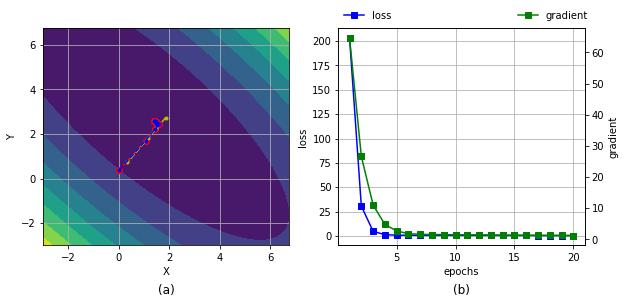

╔booth═════════════╦═════════════╦═══════════════╦═══════════════╦══════╦══════╦═════════════╦══════╗
║ ep ║ pt_1        ║ pt_2        ║ g_1           ║ g_2           ║ f_1  ║ f_2  ║ pt          ║ f    ║
╠════╬═════════════╬═════════════╬═══════════════╬═══════════════╬══════╬══════╬═════════════╬══════╣
║ 20 ║ [1.41 2.59] ║ [1.41 2.59] ║ [ 0.85 -0.82] ║ [ 0.85 -0.82] ║ 0.35 ║ 0.35 ║ [1.41 2.59] ║ 0.35 ║
╚════╩═════════════╩═════════════╩═══════════════╩═══════════════╩══════╩══════╩═════════════╩══════╝


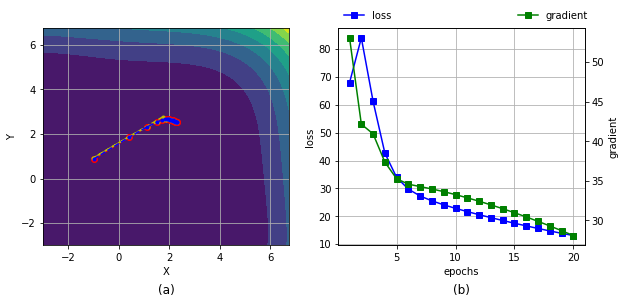

╔himmelblau════════╦═════════════╦═════════════════╦═════════════════╦═══════╦═══════╦═════════════╦═══════╗
║ ep ║ pt_1        ║ pt_2        ║ g_1             ║ g_2             ║ f_1   ║ f_2   ║ pt          ║ f     ║
╠════╬═════════════╬═════════════╬═════════════════╬═════════════════╬═══════╬═══════╬═════════════╬═══════╣
║ 20 ║ [2.32 2.52] ║ [2.32 2.52] ║ [-25.84  11.03] ║ [-25.84  11.03] ║ 13.09 ║ 13.09 ║ [2.32 2.52] ║ 13.09 ║
╚════╩═════════════╩═════════════╩═════════════════╩═════════════════╩═══════╩═══════╩═════════════╩═══════╝


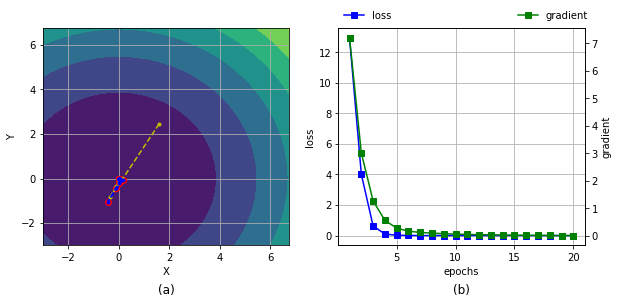

╔square══════════╦═══════════╦═══════════════╦═══════════════╦══════╦══════╦═══════════╦══════╗
║ ep ║ pt_1      ║ pt_2      ║ g_1           ║ g_2           ║ f_1  ║ f_2  ║ pt        ║ f    ║
╠════╬═══════════╬═══════════╬═══════════════╬═══════════════╬══════╬══════╬═══════════╬══════╣
║ 20 ║ [ 0. -0.] ║ [ 0. -0.] ║ [ 0.01 -0.  ] ║ [ 0.01 -0.  ] ║ 0.00 ║ 0.00 ║ [ 0. -0.] ║ 0.00 ║
╚════╩═══════════╩═══════════╩═══════════════╩═══════════════╩══════╩══════╩═══════════╩══════╝


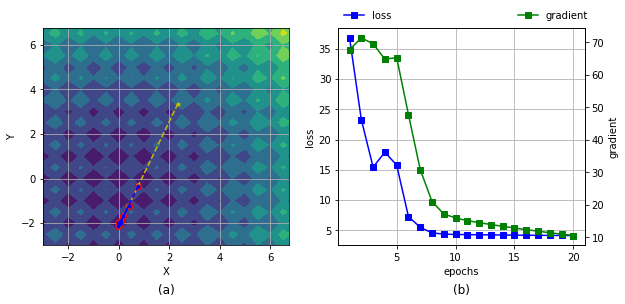

╔rastrigin═══════════╦═══════════════╦═══════════════╦═══════════════╦══════╦══════╦═══════════════╦══════╗
║ ep ║ pt_1          ║ pt_2          ║ g_1           ║ g_2           ║ f_1  ║ f_2  ║ pt            ║ f    ║
╠════╬═══════════════╬═══════════════╬═══════════════╬═══════════════╬══════╬══════╬═══════════════╬══════╣
║ 20 ║ [ 0.02 -2.  ] ║ [ 0.02 -2.  ] ║ [ 9.67 -4.12] ║ [ 9.67 -4.11] ║ 4.12 ║ 4.12 ║ [ 0.02 -2.  ] ║ 4.12 ║
╚════╩═══════════════╩═══════════════╩═══════════════╩═══════════════╩══════╩══════╩═══════════════╩══════╝


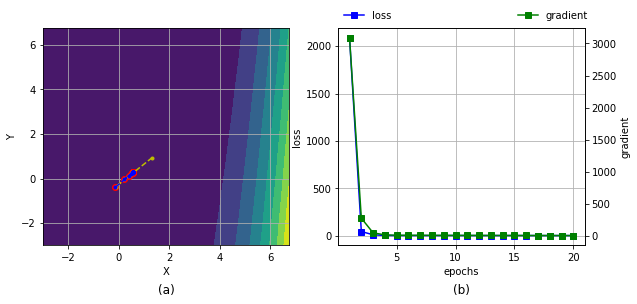

╔rosenbrock════════╦═════════════╦═══════════════╦═══════════════╦══════╦══════╦═════════════╦══════╗
║ ep ║ pt_1        ║ pt_2        ║ g_1           ║ g_2           ║ f_1  ║ f_2  ║ pt          ║ f    ║
╠════╬═════════════╬═════════════╬═══════════════╬═══════════════╬══════╬══════╬═════════════╬══════╣
║ 20 ║ [0.55 0.28] ║ [0.55 0.28] ║ [ 3.4  -3.93] ║ [ 3.4  -3.93] ║ 0.24 ║ 0.24 ║ [0.55 0.28] ║ 0.24 ║
╚════╩═════════════╩═════════════╩═══════════════╩═══════════════╩══════╩══════╩═════════════╩══════╝


In [106]:
sdirs = [t.tensor([1, 0], dtype=t.float), t.tensor([0, 1], dtype=t.float)]
eut = 1

print('-'*80)
print("Noise Added: ", g_std)
print('-'*80)
for fn_name in lr:
    params = [
        [t.tensor(np.random.normal(
            loc=np.random.randint(1, 3), scale=np.random.randint(1, 2), 
            size=(2,)), dtype=t.float, requires_grad=True)],
        [t.tensor(np.random.normal(
            loc=np.random.randint(-3, -1), scale=np.random.randint(1, 2), 
            size=(2,)), dtype=t.float, requires_grad=True)]]

    table = [['ep', 'pt_1', 'pt_2', 'g_1', 'g_2', 'f_1', 'f_2', 'pt', 'f']]
    for epoch in range(num_epochs):
        loss = [fn[fn_name](params[0]),
                fn[fn_name](params[1])]
        opt = [DirectedGradient(params[0], lr=lr[fn_name]),
               DirectedGradient(params[1], lr=lr[fn_name])]
        opt[0].zero_grad()
        opt[1].zero_grad()
        loss[0].backward()
        loss[1].backward()
        for idx, sdir in enumerate(sdirs):
            sgd_step(
                params[idx], opt[idx], lr[fn_name], g_std
            )
            
        g_0 = params[0][0].grad.clone()
        g_1 = params[1][0].grad.clone()
        p_avg = params[0][0].detach().clone()/2 + params[1][0].detach().clone()/2
        low_idx = np.argmin(loss)
        p_min = params[low_idx][0].detach().clone()
        if (epoch+1)%log_int == 0:
            table.append([
                epoch+1, params[0][0].clone().detach().numpy(),
                params[1][0].clone().detach().numpy(),
                g_0.numpy(), g_1.numpy(), 
                '{:.2f}'.format(loss[0].detach().numpy()), 
                '{:.2f}'.format(loss[1].detach().numpy()), 
                p_avg.clone().detach().numpy(),
                '{:.2f}'.format(loss[0].item()/2 + loss[1].item()/2)
            ])
            
        opt[0].step(lr[fn_name])
        opt[1].step(lr[fn_name])
        if epoch % eut == 0:
            params[0][0] = p_avg.clone()
            params[0][0].requires_grad = True
            params[1][0] = p_min.clone()
            params[1][0].requires_grad = True

    fig = plt.figure(figsize=(15, 4))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = ax2.twinx()

    x = np.arange(xc-xlim, xc+xlim, delta)
    y = np.arange(yc-ylim, yc+ylim, delta)
    X, Y = np.meshgrid(x, y)
    size = X.shape
    Z = np.array([fn[fn_name]([t.tensor(_)]).item() for _ in zip(X.flatten(), Y.flatten())]).reshape(size)
    CS = ax1.contourf(X, Y, Z)
    ax1.set_title('(a)', y=-0.25)
    x0, x1, x2, y0, y1, y2 = [], [], [], [], [], []
    for row in table[1:]:
        pt0 = row[-2]
        x0.append(pt0[0].item())
        y0.append(pt0[1].item())
        pt1 = row[1]
        x1.append(pt1[0].item())
        y1.append(pt1[1].item())
        pt2 = row[2]
        x2.append(pt2[0].item())
        y2.append(pt2[0].item())
    ax1.plot(x0, y0, 'ro-')
    ax1.plot(x1, y1, 'y.--')
    ax1.plot(x0, y0, 'b.--')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid()


    data = [(_[0], t.norm(t.tensor(_[3])).item()/2 + t.norm(t.tensor(_[4])).item()/2, float(_[-1])) for _ in table[1:]]
    x, y2, y1 = zip(*data)
    ax2.plot(x, y1, 'bs-', label='loss')
    ax3.plot(x, y2, 'gs-', label='gradient')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('loss')
    ax3.set_ylabel('gradient')
    ax2.set_title('(b)', y=-0.25)
    ax2.grid()
    ax2.legend(loc='upper right', bbox_to_anchor=(-1, 1.1, 1.25, 0.02), frameon=False)
    ax3.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.1, 1.25, 0.02), frameon=False)
    plt.show()

    if final_table:
        table = [table[0], table[-1]]
    table = Table(table, fn_name)
    table.justify_columns[0] = 'right'
    print(table.table)